<a href="https://colab.research.google.com/github/Akowsor15/Project_chatbot/blob/main/Project2CV_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing & Importing Libraries**

In [ ]:
!pip install face_recognition
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import face_recognition
import numpy as np
from PIL import ImageDraw
import PIL.Image
from io import BytesIO
import cv2
import operator
import time
from google.colab import files
from google.colab.patches import cv2_imshow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=2dab2f2b612c2c2b8b2996be05f6496bb21c487f3f8454b5045efdbae5904350
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


# **Face Detection**

Uploading Images

In [ ]:
upload1 = files.upload()
upload2 = files.upload()
upload3 = files.upload()

# (Found at (https://neptune.ai/blog/google-colab-dealing-with-files#:~:text=Uploading%20files%20from%20local%20file,in%20the%20present%20working%20directory.&text=2.,Select%20the%20“upload”%20option.))

Saving 20140428-attention.jpg to 20140428-attention.jpg


Saving p1.JPG to p1.JPG


Saving p2.JPG to p2.JPG


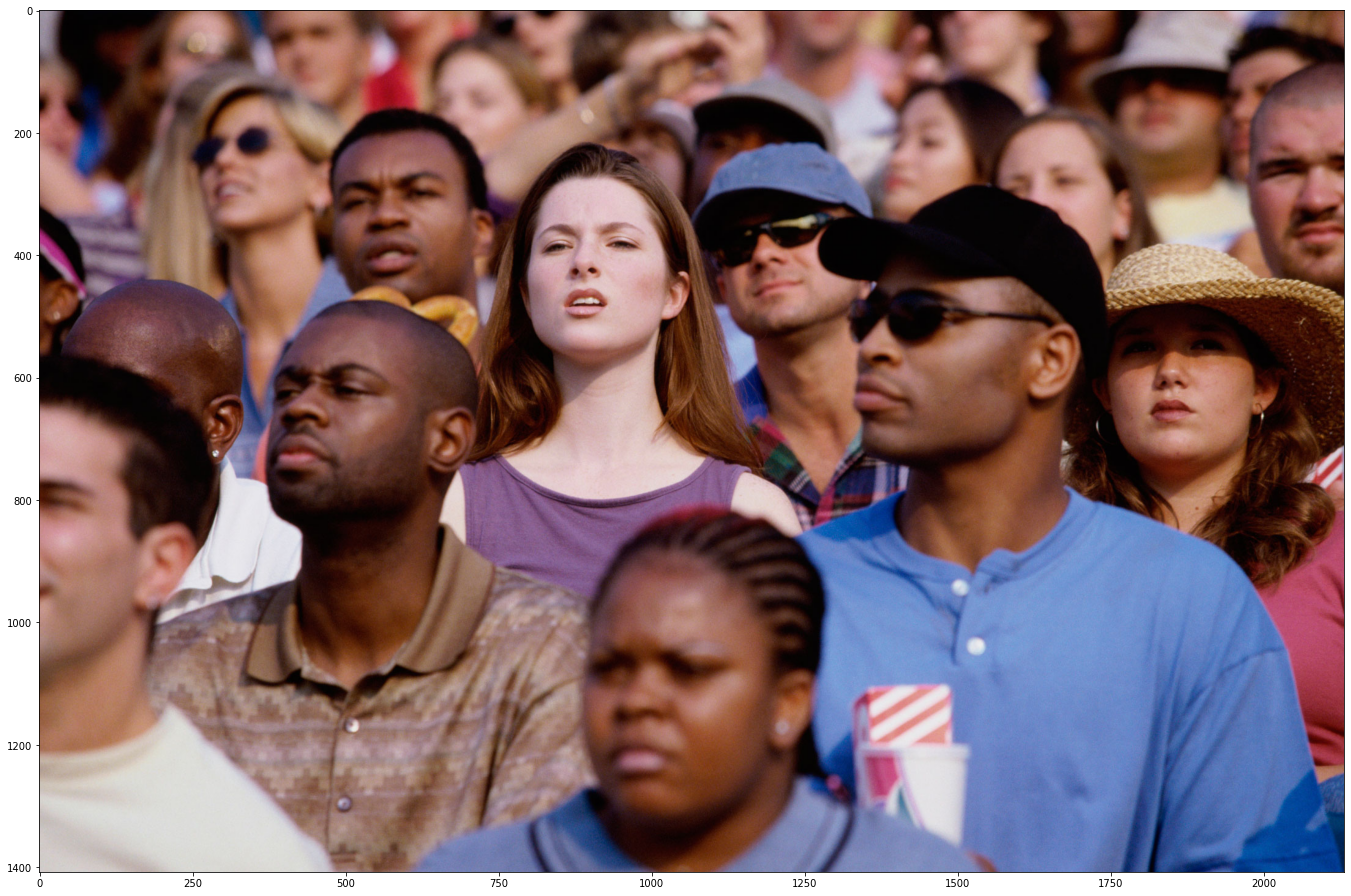

In [ ]:
image = face_recognition.load_image_file(list(upload1.keys())[0])
boundary = 30
im = PIL.Image.open(list(upload1.keys())[0])
height = (im.size[1] / im.size[0]) * 24
fig = plt.subplots(figsize=(24,height))
imshow(im)

# (Found at (https://github.com/ageitgey/face_recognition))

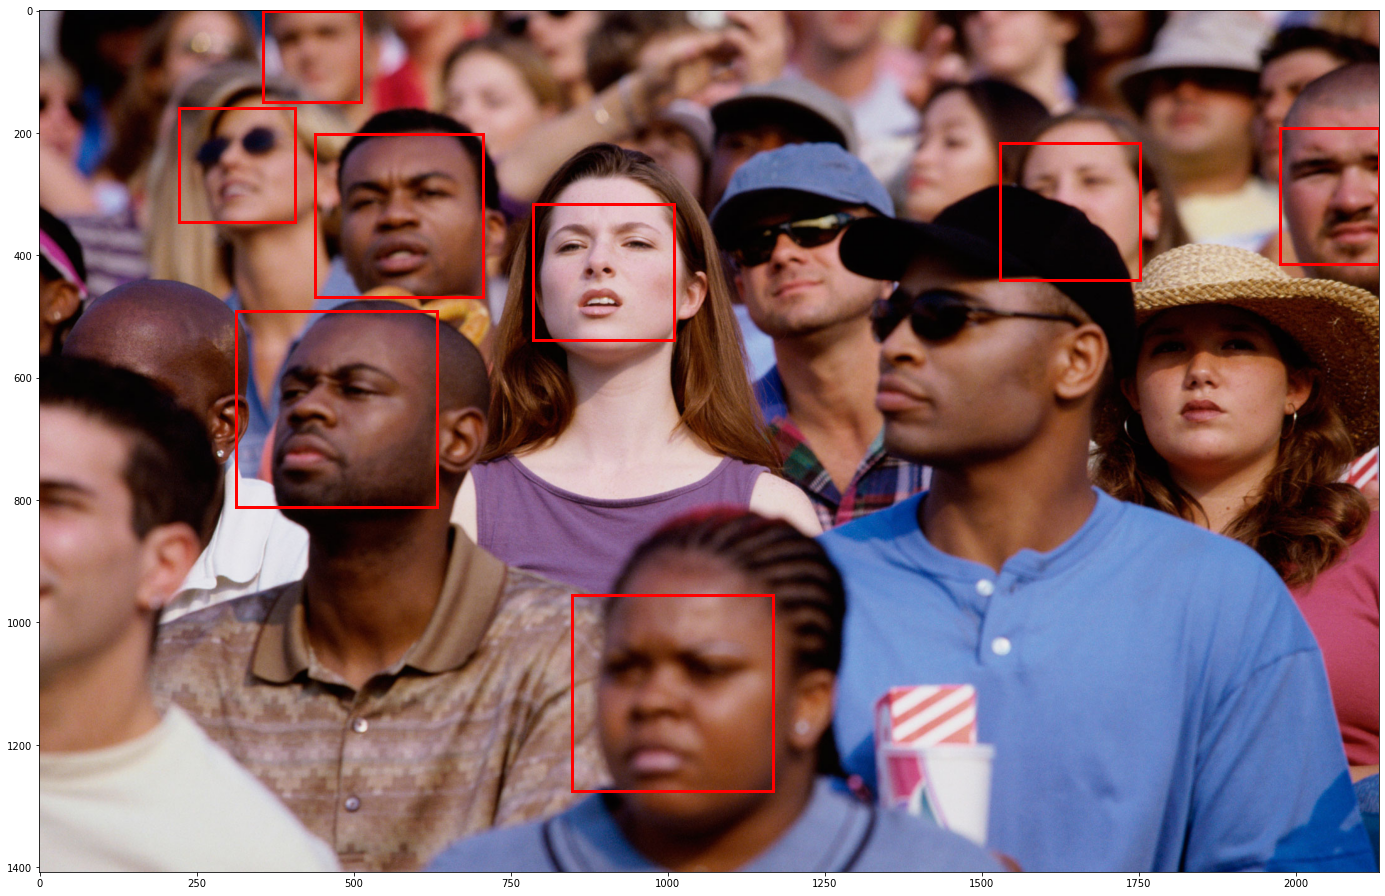

In [32]:
start = time.time()
face_locations = face_recognition.face_locations(image)
fig,ax = plt.subplots(figsize=(24,height))
for face_location in face_locations:
  top, right, bottom, left = face_location
  ax.imshow(im, aspect='auto')
  rect = patches.Rectangle((left,top), (right - left), (bottom-top),linewidth=3,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
end = time.time()

# (Found at (https://github.com/ageitgey/face_recognition))

In [ ]:
p1_img = face_recognition.load_image_file(list(upload2.keys())[0])
p1_encoding = face_recognition.face_encodings(p1_img)[0]

p2_img = face_recognition.load_image_file(list(upload3.keys())[0])
p2_encoding = face_recognition.face_encodings(p2_img)[0]

known_face_encodings = [
    p1_encoding,
    p2_encoding
]
known_face_names = [
    "Person 1",
    "Person 2"
]

up_img = face_recognition.load_image_file(list(upload1.keys())[0])

face_locations = face_recognition.face_locations(up_img)
face_encodings = face_recognition.face_encodings(up_img, face_locations)

#pil_image = imageDraw.(up_img)
#draw = imageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    
    if True in matches:
         first_match_index = matches.index(True)
         name = known_face_names[first_match_index]

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]


    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

#del draw

pil_image.show()

# (Found at (https://github.com/ageitgey/face_recognition/blob/master/examples/identify_and_draw_boxes_on_faces.py))

NameError: ignored